In [259]:
import pandas_datareader as pdr
import numpy as np
import seaborn as sns
import datetime
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.dates as mdates
import mplfinance as mpf
#from mplfinance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc

stock = pdr.get_data_yahoo('ptt.BK', 
                          start=datetime.datetime(2018, 12, 1), 
                          end=datetime.datetime(2020, 1, 10))


In [260]:
stock

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-03,52.25,50.25,50.50,51.75,102166400.0,48.147438
2018-12-04,51.75,51.00,51.50,51.50,59150400.0,47.914841
2018-12-06,50.75,50.00,50.50,50.25,57776700.0,46.751862
2018-12-07,50.75,49.50,50.50,49.50,60108000.0,46.054066
2018-12-11,49.75,49.00,49.50,49.25,51995700.0,45.821476
...,...,...,...,...,...,...
2020-01-06,47.75,46.50,47.25,47.00,91026800.0,45.731289
2020-01-07,47.25,46.25,47.25,47.25,60059600.0,45.974541
2020-01-08,47.75,46.75,47.50,46.75,57759900.0,45.488037


In [261]:
stock.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object

In [262]:
Price_Max = stock['Adj Close'].max()
Price_Max

48.147438049316406

In [263]:
Price_Min = stock['Adj Close'].min()
Price_Min

38.869998931884766

In [264]:
Diff = Price_Max - Price_Min 
Diff

9.27743911743164

In [265]:
level1 = Price_Max - 0.236 * Diff
level2 = Price_Max - 0.382 * Diff
level3 = Price_Max - 0.5   * Diff
level4 = Price_Max - 0.618 * Diff
level5 = Price_Max - 0.786* Diff

#level5 = Price_Max - 1.618 * Diff


In [266]:
print ("Level", " ", "PRICE")

print ("0 ", "               " , Price_Max)
print ("level1 : 0.236", "   " ,level1)
print ("level2 : 0.382",  "   ",level2)
print ("level3 : 0.5","     ",  level3)
print ("level4 : 0.618","   ",  level4)
print ("level5 : 0.786","   ",  level5)
print ("1 ",   "               ", Price_Min)

Level   PRICE
0                  48.147438049316406
level1 : 0.236     45.95796241760254
level2 : 0.382     44.60345630645752
level3 : 0.5       43.508718490600586
level4 : 0.618     42.413980674743655
level5 : 0.786     40.855370903015135
1                  38.869998931884766


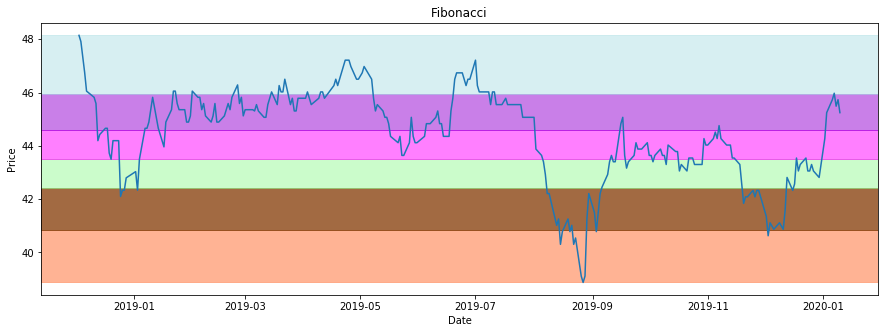

In [267]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(stock['Adj Close'])

ax.axhspan(level5, Price_Min, alpha=0.8, color='lightsalmon')    #100% -  78.6%
ax.axhspan(level4, level5,    alpha=0.8, color='SaddleBrown')    #78.6% - 61.8%
ax.axhspan(level3, level4,    alpha=0.5, color='palegreen')      #61.8% - 50%
ax.axhspan(level2, level3,    alpha=0.5, color='Magenta')        #50% - 38.2%
ax.axhspan(level1, level2,    alpha=0.5, color='DarkViolet')     #38.2% - 23.6%
ax.axhspan(Price_Max, level1, alpha=0.5, color='powderblue')     #23.6% - 0%

plt.ylabel("Price")
plt.xlabel("Date")

plt.title('Fibonacci')

plt.show()

<BarContainer object of 269 artists>

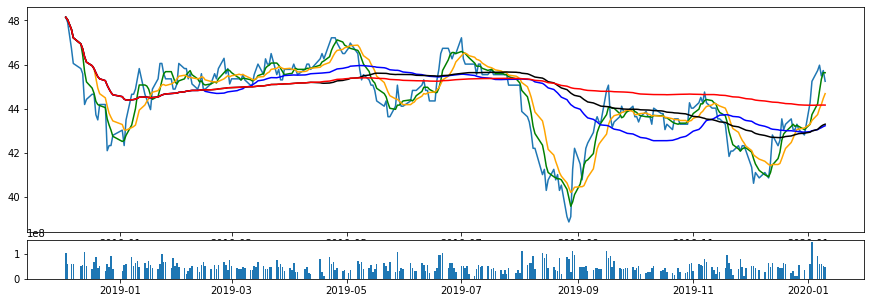

In [271]:
plt.figure(figsize=(15,5))
stock_copy= stock.copy()
stock_copy['5ma']  = stock['Adj Close'].rolling(window=5,min_periods=0).mean()
stock_copy['10ma'] = stock['Adj Close'].rolling(window=10,min_periods=0).mean()

stock_copy['50ma']  = stock['Adj Close'].rolling(window=50,min_periods=0).mean()
stock_copy['89ma']  = stock['Adj Close'].rolling(window=89,min_periods=0).mean()
stock_copy['200ma'] = stock['Adj Close'].rolling(window=200,min_periods=0).mean()

ax1=plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2=plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)

ax1.plot(stock.index, stock['Adj Close'])
ax1.plot(stock_copy.index, stock_copy['5ma'],   color = 'green')
ax1.plot(stock_copy.index, stock_copy['10ma'],  color = 'orange')
ax1.plot(stock_copy.index, stock_copy['50ma'],  color = 'blue')
ax1.plot(stock_copy.index, stock_copy['89ma'],  color = 'black')
ax1.plot(stock_copy.index, stock_copy['200ma'], color = 'red')

ax2.bar(stock.index, stock['Volume'])  #Volume

        Date       open       high        low      close
36  737391.0  42.325768  42.325768  40.623005  40.866257
37  737401.0  41.109509  42.812271  40.866257  42.569019
38  737411.0  43.542023  43.542023  43.055523  43.055523
39  737421.0  42.812271  45.731289  42.812271  45.731289
40  737431.0  45.974541  45.974541  45.244785  45.244785


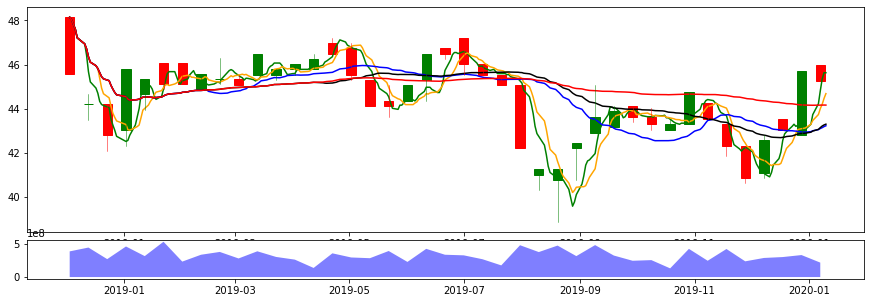

In [272]:
stock_ohlc   = stock['Adj Close'].resample('10D').ohlc()
stock_volume = stock['Volume'].resample('10D').sum()

stock_ohlc.reset_index(inplace=True)
stock_ohlc['Date'] = stock_ohlc['Date'].map(mdates.date2num)

#print(stock_volume)
print(stock_ohlc.tail())


plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)
ax1.xaxis_date()

ax1.plot(stock_copy.index, stock_copy['5ma']  ,  color = 'green')
ax1.plot(stock_copy.index, stock_copy['10ma'] ,  color = 'orange')
ax1.plot(stock_copy.index, stock_copy['50ma'] ,  color = 'blue')
ax1.plot(stock_copy.index, stock_copy['89ma'] ,  color = 'black')
ax1.plot(stock_copy.index, stock_copy['200ma'],  color = 'red')

candlestick_ohlc(ax1, stock_ohlc.values, width=5, colorup = 'green')

ax2.fill_between(stock_volume.index.map(mdates.date2num), stock_volume.values,0,facecolor='b', alpha=0.5)
plt.show()

Date
2018-12-03    279201500.0
2018-12-08    107452800.0
2018-12-13    197661500.0
2018-12-18    246670900.0
2018-12-23    229002200.0
                 ...     
2019-12-18    166244300.0
2019-12-23    134966300.0
2019-12-28     33688500.0
2020-01-02    297482100.0
2020-01-07    217465400.0
Freq: 5D, Name: Volume, Length: 81, dtype: float64


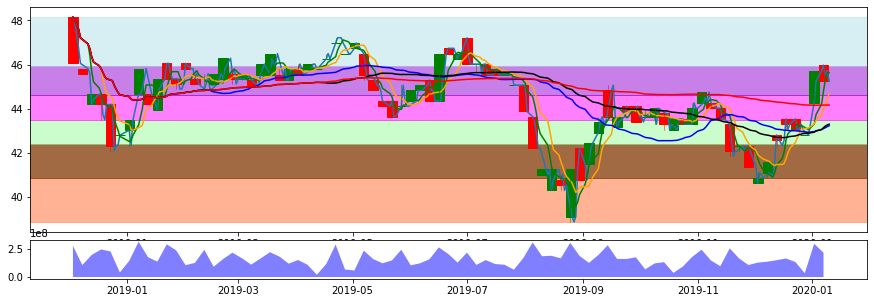

In [283]:
stock_ohlc   = stock['Adj Close'].resample('5D').ohlc()
stock_volume = stock['Volume'].resample('5D').sum()

stock_ohlc.reset_index(inplace=True)
stock_ohlc['Date'] = stock_ohlc['Date'].map(mdates.date2num)

print(stock_volume)
#print(stock_ohlc.tail())

Price_Max = stock['Adj Close'].max()
Price_Min = stock['Adj Close'].min()
Diff = Price_Max - Price_Min 

level1 = Price_Max - 0.236 * Diff
level2 = Price_Max - 0.382 * Diff
level3 = Price_Max - 0.5   * Diff
level4 = Price_Max - 0.618 * Diff
level5 = Price_Max - 0.786 * Diff


plt.figure(figsize=(15,5))

ax.plot(stock['Adj Close'])

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=5,colspan=1)
ax2 = plt.subplot2grid((6,1),(5,0),rowspan=1,colspan=1,sharex=ax1)



ax1.plot(stock['Adj Close'])
ax1.axhspan(level5, Price_Min, alpha=0.8, color='lightsalmon')    #100% -  78.6%
ax1.axhspan(level4, level5,    alpha=0.8, color='SaddleBrown')    #78.6% - 61.8%
ax1.axhspan(level3, level4,    alpha=0.5, color='palegreen')      #61.8% - 50%
ax1.axhspan(level2, level3,    alpha=0.5, color='Magenta')        #50% - 38.2%
ax1.axhspan(level1, level2,    alpha=0.5, color='DarkViolet')     #38.2% - 23.6%
ax1.axhspan(Price_Max, level1, alpha=0.5, color='powderblue')     #23.6% - 0%





ax1.xaxis_date()
ax1.plot(stock_copy.index, stock_copy['5ma']  ,  color = 'green')
ax1.plot(stock_copy.index, stock_copy['10ma'] ,  color = 'orange')
ax1.plot(stock_copy.index, stock_copy['50ma'] ,  color = 'blue')
ax1.plot(stock_copy.index, stock_copy['89ma'] ,  color = 'black')
ax1.plot(stock_copy.index, stock_copy['200ma'],  color = 'red')





candlestick_ohlc(ax1, stock_ohlc.values, width=5, colorup = 'green')
ax2.fill_between(stock_volume.index.map(mdates.date2num), stock_volume.values,0,facecolor='b', alpha=0.5)


plt.show()